In [1075]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
import seaborn as sns
import numpy as np

In [1076]:
trData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
data_list = [trData, testData]
trData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning
## The columns which are not numeric will be converted to numeric and the columns with too many NaNs will be removed (e.g., the Cabin)

In [1077]:
print("Total number of samples in train set is:", len(trData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(trData.isnull().sum())
print("*"*70)
print("Total number of samples in test set is:", len(testData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(testData.isnull().sum())

Total number of samples in train set is: 891
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**********************************************************************
Total number of samples in test set is: 418
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1078]:
for data in data_list:
    #data['Age'].fillna(trData['Age'].median(), inplace = True)
    data['Embarked'].fillna(trData['Embarked'].mode()[0], inplace = True)

In [1079]:
print("Total number of samples in train set is:", len(trData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(trData.isnull().sum())
print("*"*70)
print("Total number of samples in test set is:", len(testData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(testData.isnull().sum())

Total number of samples in train set is: 891
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
**********************************************************************
Total number of samples in test set is: 418
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### The Cabin column will be dropped, but the Fare column of the test set has a missing value; we could replace it with median but because Fare is very corelated with the class and Pclass is not missing we replace it with the Mean Fare value of the Pclass of the missing row

In [1080]:
PclassVsFare = trData[['Pclass','Fare']].groupby(['Pclass'], as_index = False).mean()
PclassVsFare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [1081]:
testData['Pclass'][testData['Fare'].isnull()] 

152    3
Name: Pclass, dtype: int64

In [1082]:
# The passenger with missing class has a Pclass of 3 whose average Fare is 13.67 
testData['Fare'].fillna(PclassVsFare.loc[2,'Fare'], inplace = True);

In [1083]:
for data in data_list:
    data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [1084]:
testData['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [1085]:
trData['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
the Countess      1
Mme               1
Capt              1
Lady              1
Jonkheer          1
Don               1
Sir               1
Name: Title, dtype: int64

In [1086]:
for data in data_list:
    data['Title'] = data['Title'].replace(['Lady', 'Sir', 'the Countess'], 'Royal')
    data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

In [1087]:
trData['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       20
Royal       3
Name: Title, dtype: int64

In [1088]:
testData['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [1089]:
#min_val = 10
#title_names = (trData['Title'].value_counts() < min_val)
#trData['Title'] = trData['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [1090]:
title_vs_age = trData[['Title', 'Age']].groupby(['Title'], as_index = False).mean()
title_vs_age

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.894737
5,Royal,43.333333


In [1091]:
title_vs_age.loc[title_vs_age['Title'] == 'Master', 'Age'][0]

4.5741666666666667

In [1092]:
title_vs_age.loc[0]['Title']

'Master'

In [1093]:
for i in range(0, len(title_vs_age)):
    title_temp = title_vs_age.loc[i]['Title']
    trData.loc[trData['Age'].isnull() & (trData['Title'] == title_temp), 'Age'] = title_vs_age.loc[title_vs_age['Title'] == title_temp, 'Age'][i]
    testData.loc[testData['Age'].isnull() & (testData['Title'] == title_temp), 'Age'] = title_vs_age.loc[title_vs_age['Title'] == title_temp, 'Age'][i]

## Cabin code; missing cabin code is converted to 0, and existing ones converted to 1

In [1094]:
for data in data_list:
    data['CabinCode'] = (data['Cabin'].notnull()) * 1

## Transfer categorial values to discrete values

In [1095]:
trData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [1096]:
trData['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

In [1097]:
age_bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
age_labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
trData['AgeGroup'] = pd.cut(trData["Age"], age_bins, labels = age_labels)
testData['AgeGroup'] = pd.cut(testData["Age"], age_bins, labels = age_labels)

In [1098]:
trData['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1099]:
trData['Fare'].describe()
fare_bins = [-0.1, 7.92, 14.46, 31, np.inf]
fare_labels = ['Cheap', 'BelowAverage', 'Average', 'Expensive']
trData['FareBin'] = pd.cut(trData['Fare'], fare_bins, labels = fare_labels)
testData['FareBin'] = pd.cut(testData['Fare'], fare_bins, labels = fare_labels)

In [1100]:
trData['FareBin'].value_counts()

BelowAverage    227
Cheap           223
Expensive       222
Average         219
Name: FareBin, dtype: int64

In [1101]:
for data in data_list:
    #data['FareBinCode'] = label.fit_transform(data['FareBin'])
    #data['AgeBinCode'] = label.fit_transform(data['AgeBin']) 
    data['SexCode'] = data['Sex'].replace(['female', 'male'], [0, 1])
    data['EmbarkedCode'] = data['Embarked'].replace(['S', 'Q', 'C'], [0, 1, 2])
    data['TitleCode'] = data['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master','Royal', 'Rare'], [0, 1, 2, 3, 4, 5])
    data['Nfamily'] = data['Parch'] + data['SibSp']
    data['IsAlone'] = 1
    data.loc[data['Nfamily'] > 0, 'IsAlone'] = 0
    data['AgeGroup'] = data['AgeGroup'].replace(age_labels,[0, 1, 2, 3, 4, 5, 6])
    data['FareBin'] = data['FareBin'].replace(fare_labels, [0, 1, 2, 3])

In [1102]:
testData.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
Title             0
CabinCode         0
AgeGroup          0
FareBin           0
SexCode           0
EmbarkedCode      0
TitleCode         0
Nfamily           0
IsAlone           0
dtype: int64

# Statistical Analysis and feature engineering

In [1103]:
trData[['Nfamily', 'Survived']].groupby(['Nfamily'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Nfamily,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [1104]:
trData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [1105]:
trData[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1106]:
trData[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1107]:
trData['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [1108]:
trData[['Pclass','Fare','Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Fare,Survived
0,1,84.154687,0.629630
1,2,20.662183,0.472826
2,3,13.675550,0.242363


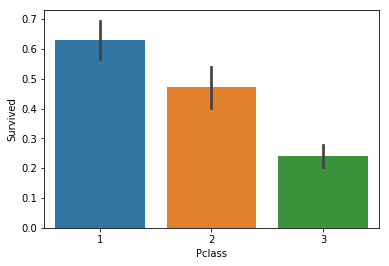

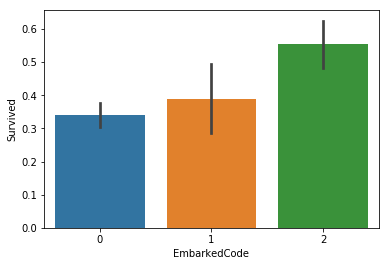

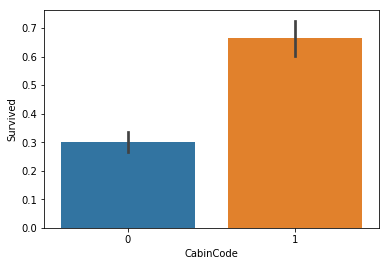

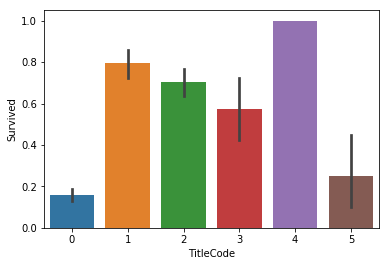

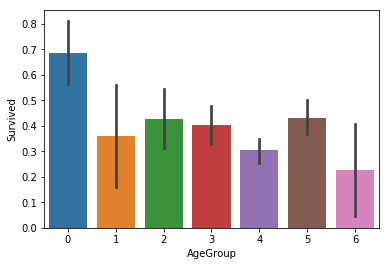

In [1109]:
sns.barplot(x="Pclass", y="Survived", data=trData)
plt.show()
sns.barplot(x="EmbarkedCode", y="Survived", data=trData)
plt.show()
sns.barplot(x = "CabinCode", y = "Survived", data = trData)
plt.show()
sns.barplot(x = "TitleCode", y = "Survived", data = trData)
plt.show()
sns.barplot(x = "AgeGroup", y = "Survived", data = trData)
plt.show()

In [1110]:
pd.crosstab(trData['Sex'], trData['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [1111]:
trData[['TitleCode','Survived']].groupby(['TitleCode'], as_index = False).mean()

,TitleCode,Survived
0,0,0.156673
1,1,0.793651
2,2,0.702703
3,3,0.575000
4,4,1.000000
5,5,0.250000


In [1112]:
age_kid = 16
print("Number of kids younger than {} is {}.".format(age_kid, (trData['Age'] < age_kid).sum()))
kids_survival_rate = trData['Survived'][trData['Age'] < age_kid].sum() / (trData['Age'] < age_kid).sum()
overal_survival_rate = trData['Survived'].sum() / len(trData['Survived'])
print("Survival rate of these kids is {} while the overal survival rate is {}.".format(round(kids_survival_rate, 2), round(overal_survival_rate, 2)))

Number of kids younger than 16 is 87.
Survival rate of these kids is 0.59 while the overal survival rate is 0.38.


In [1113]:
for data in data_list:
    data['IsChild'] = (data['Age'] < age_kid) * 1

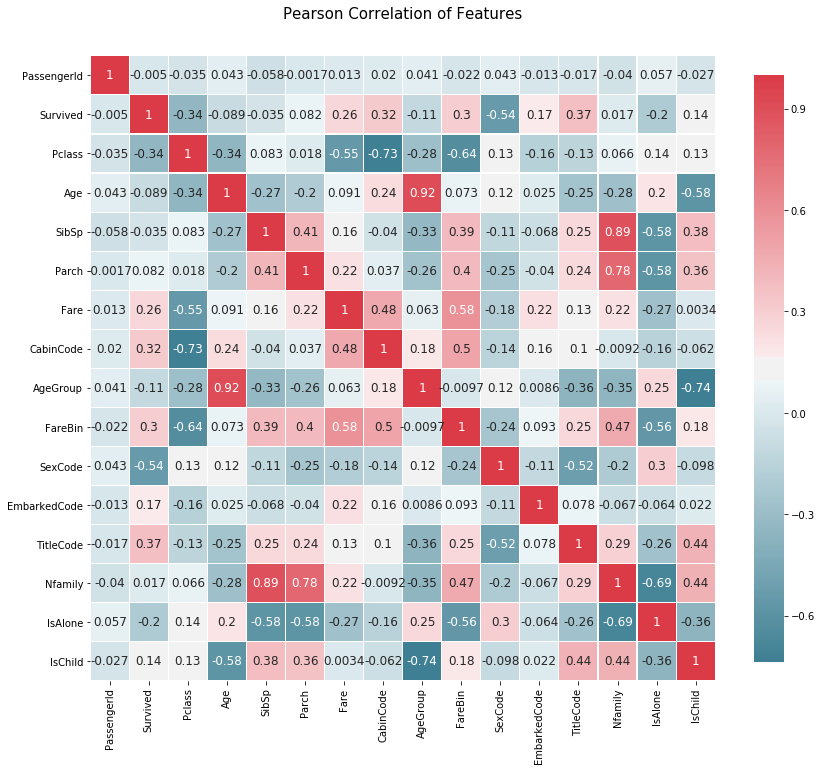

In [1114]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(trData)
plt.show()

# Classification models

In [1115]:
selectedFeatures = ['Pclass', 'SexCode', 'AgeGroup', 'FareBin', 'TitleCode', 'Nfamily', 'IsAlone', 'EmbarkedCode','IsChild',
                   'CabinCode'];
X = trData[selectedFeatures]
y = trData['Survived']

In [1116]:
X.head()

,Pclass,SexCode,AgeGroup,FareBin,TitleCode,Nfamily,IsAlone,EmbarkedCode,IsChild,CabinCode
0,3,1,3,0,0,1,0,0,0,0
1,1,0,5,3,1,1,0,2,0,1
2,3,0,4,1,2,0,1,0,0,0
3,1,0,4,3,1,1,0,0,0,1
4,3,1,4,1,0,0,1,0,0,0


In [1117]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [1120]:
# Knearest neighbor
score = []
for n in range(1, 50):
    kneighbor = KNeighborsClassifier(n_neighbors=n)
    kneighbor.fit(Xtrain, ytrain)
    ypredict = kneighbor.predict(Xtest)
    score.append(metrics.accuracy_score(ytest, ypredict))
max(score)

0.83856502242152464

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0) 
grid_bool = [True, False]
C_param_range = [0.001,0.01,0.1,0.2,1,10,11,12,13,20, 30, 40]
grid_ratio_list = [.1, .25, .5, .75, 1.0]

grid_n_estimator = [10, 50, 100, 300]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

clf_list = [LogisticRegression(), SVC(), ensemble.GradientBoostingClassifier(), ensemble.RandomForestClassifier(), ensemble.ExtraTreesClassifier()
           ]
grid_param_list = [[{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'C': C_param_range,
            #'solver': ['newton-cg','lbfgs','liblinear']
             }],
             [{
            'C': C_param_range,
             'gamma': grid_ratio_list
             }],
             [{
              'max_depth': grid_max_depth   
             }], 
             [{
             'n_estimators': grid_n_estimator, #default=10
             'criterion': grid_criterion, #default=”gini”
             'max_depth': grid_max_depth, #default=None
             #'oob_score': [True],
             'random_state': grid_seed
             }],
             [{
             'n_estimators': grid_n_estimator, #default=10
             'criterion': grid_criterion, #default=”gini”
             'max_depth': grid_max_depth, #default=None
             #'oob_score': [True],
             'random_state': grid_seed
             }]
             ]
for clf, param in zip (clf_list, grid_param_list):
    best_search = model_selection.GridSearchCV(estimator = clf, param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X, y)
    best_param = best_search.best_params_
    best_error = best_search.best_score_
    print('The best parameter for {} is {} with a runtime of seconds with a score of {}'.format(clf.__class__.__name__, best_param, best_error))
    clf.set_params(**best_param) 

The best parameter for LogisticRegression is {'C': 10, 'fit_intercept': True} with a runtime of seconds with a score of 0.863849737669326


In [ ]:
from sklearn.model_selection import cross_val_score
# logistic regression
C_param_range = [0.001,0.01,0.1,0.2,1,10,11,12,13]
score = []
for c in C_param_range:
    logreg = LogisticRegression(C = c)
    logreg.fit(Xtrain, ytrain)
    ypredict = logreg.predict(Xtest)
    lgscore = (metrics.accuracy_score(ytest, ypredict))
    scores = cross_val_score(logreg, X, y, cv = 5)
    print("Accuracy %0.4f" % scores.mean(), "C = ", c)

In [ ]:
C_max = 1
logreg = LogisticRegression(C = C_max, fit_intercept=True)
logreg.fit(Xtrain, ytrain)
ypredict = logreg.predict(Xtest)
lgscore = (metrics.accuracy_score(ytest, ypredict))
print(lgscore)
metrics.confusion_matrix(ytest, ypredict)

In [ ]:
len(ytest)

In [ ]:
# Naive Baise
from sklearn.naive_bayes import GaussianNB
naiveB = GaussianNB()
naiveB.fit(Xtrain, ytrain)
ypredict = naiveB.predict(Xtest)
nbscore = (metrics.accuracy_score(ytest, ypredict))
print(nbscore)
metrics.confusion_matrix(ytest, ypredict)

In [ ]:
# SVM
C_max = 1
svmclf = SVC(C = C_max, gamma=0.1)
svmclf.fit(Xtrain, ytrain)
ypredict = svmclf.predict(Xtest)
svmscore = metrics.accuracy_score(ytest, ypredict)
print(svmscore)
metrics.confusion_matrix(ytest, ypredict)

## From the above comparisons Logistic Regression with an accuracy of 0.83 is the best predictor 

In [ ]:
C_max = 40
logreg = LogisticRegression(C = C_max, fit_intercept = True, random_state = 0)
logreg.fit(X, y)
arpredict = logreg.predict(Xtest)
metrics.accuracy_score(ytest, arpredict)

In [ ]:
randforest = ensemble.RandomForestClassifier(max_depth = 8, n_estimators=300, criterion = 'gini')
randforest.fit(X, y)
arpredict = randforest.predict(Xtest)
metrics.accuracy_score(ytest, arpredict)

In [ ]:
testDataTemp = testData[selectedFeatures]
arPredict = randforest.predict(testDataTemp)

In [ ]:
testDataTemp.head()

In [ ]:
yPredict = pd.DataFrame({'PassengerId':testData['PassengerId'], 'Survived': arPredict})

In [ ]:
yPredict.head()

In [ ]:
yPredict.to_csv('../predictions.csv', index = False)
yPredict.shape

In [ ]:
X.head()

In [ ]:
testDataTemp.head()

In [ ]:
sum(trData['Survived'])

In [ ]:
len(trData['Survived'])

In [ ]:
import seaborn as sns
g = sns.FacetGrid(trData, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

In [ ]:
grid = sns.FacetGrid(trData, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(trData['Name'])